In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import pickle

In [2]:
df_crops = pd.read_csv("/kaggle/input/crop-recommendation-dataset/Crop_recommendation.csv")

In [3]:
df_crops.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [4]:
df_crops.isnull().sum()


N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [5]:
df_crops.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
df_crops.sample(frac=1)


,N,P,K,temperature,humidity,ph,rainfall,label
317,27,80,15,19.070962,21.210923,5.788387,86.219176,kidneybeans
884,36,65,16,25.712698,64.112333,7.692014,50.170678,lentil
81,72,45,35,25.429775,82.946826,5.758506,195.357454,rice
908,25,27,41,19.200904,94.276596,6.923509,108.042355,pomegranate
1267,40,132,202,24.575584,80.706958,5.971813,69.706113,grapes
...,...,...,...,...,...,...,...,...
268,52,56,85,20.118745,14.442283,6.817124,88.681686,chickpea
919,18,23,44,23.710281,89.617942,6.184400,105.649991,pomegranate
2008,67,55,44,26.284017,75.146402,7.251847,182.268545,jute
1618,13,5,8,23.853404,90.105225,7.474711,103.923226,orange


In [7]:
df_crops['label'].unique()


array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [8]:
df_crops['label'].value_counts()


rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [9]:
df_crops.describe().T


,count,mean,std,min,25%,50%,75%,max
N,2200.0,50.551818,36.917334,0.000000,21.000000,37.000000,84.250000,140.000000
P,2200.0,53.362727,32.985883,5.000000,28.000000,51.000000,68.000000,145.000000
K,2200.0,48.149091,50.647931,5.000000,20.000000,32.000000,49.000000,205.000000
temperature,2200.0,25.616244,5.063749,8.825675,22.769375,25.598693,28.561654,43.675493
humidity,2200.0,71.481779,22.263812,14.258040,60.261953,80.473146,89.948771,99.981876
ph,2200.0,6.469480,0.773938,3.504752,5.971693,6.425045,6.923643,9.935091
rainfall,2200.0,103.463655,54.958389,20.211267,64.551686,94.867624,124.267508,298.560117


In [10]:
crop_summary=pd.pivot_table(df_crops, index=['label'], aggfunc='mean')


In [11]:
acc = []
model = []
x = df_crops[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = df_crops['label']
print("Shape of x:", x.shape, "Shape of y:", y.shape)

Shape of x: (2200, 7) Shape of y: (2200,)


In [12]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=0)

In [13]:
DecisionTree = DecisionTreeClassifier(
    criterion="entropy", random_state=42)
DecisionTree.fit(x_train, y_train)
predicted_values = DecisionTree.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Decision Tree')
print(classification_report(y_test, predicted_values))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        30
   blackgram       0.97      0.97      0.97        31
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        26
      coffee       1.00      1.00      1.00        29
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        30
        jute       0.96      0.87      0.92        31
 kidneybeans       1.00      1.00      1.00        26
      lentil       1.00      1.00      1.00        22
       maize       0.93      1.00      0.96        27
       mango       1.00      1.00      1.00        28
   mothbeans       1.00      0.94      0.97        36
    mungbean       1.00      1.00      1.00        29
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      1.00        34
      papaya       0.95    

# Visualize  Decision Tree

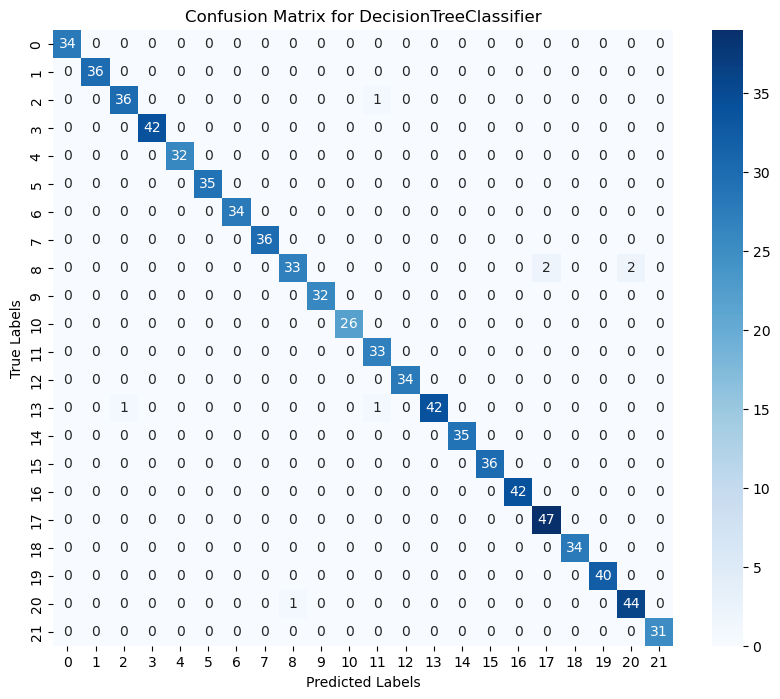

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

DecisionTree = DecisionTreeClassifier(
    criterion="entropy", random_state=42)
DecisionTree.fit(x_train, y_train)
predicted_values = DecisionTree.predict(x_test)

# Plot the confusion matrix
cm = confusion_matrix(y_test, predicted_values)
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='o')
plt.title('Confusion Matrix for DecisionTreeClassifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [15]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
DecisionTreeprediction = DecisionTree.predict(data)
print(DecisionTreeprediction)

['coffee']


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [16]:
print('Decision Tree Accuracy on training set: ',
      DecisionTree.score(x_train, y_train))
print('Decision Tree Accuracy on test set: ',
      DecisionTree.score(x_test, y_test))

Decision Tree Accuracy on training set:  1.0
Decision Tree Accuracy on test set:  0.9878787878787879


In [17]:
# Save Model as Pickel
DT_pkl_filename = 'DecisionTree.pkl'
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
DT_Model_pkl.close()

([<matplotlib.axis.XTick at 0x7b1ea9ffcc50>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

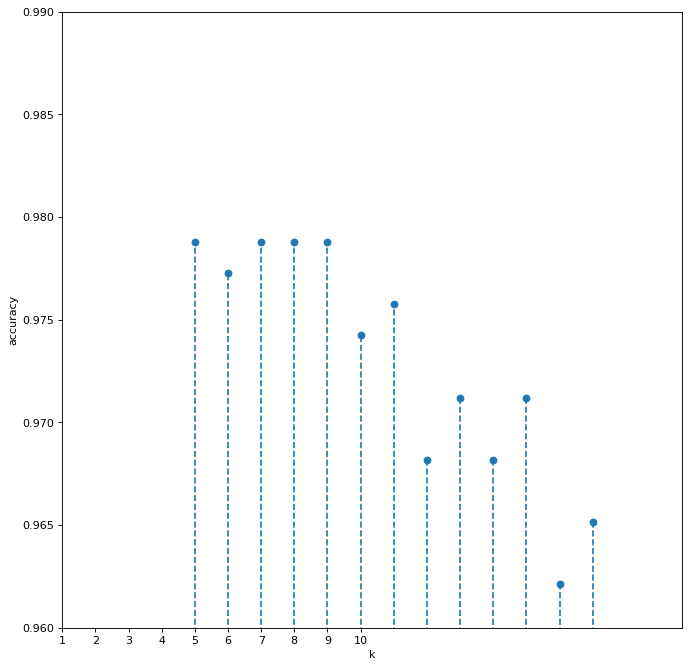

In [18]:
k_range = range(5, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    scores.append(knn.score(x_test, y_test))
from matplotlib.pyplot import figure

figure(figsize=(10, 10), dpi=80)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.vlines(k_range, 0, scores, linestyle="dashed")
plt.ylim(0.96, 0.99)
plt.xticks([i for i in range(1, 11)])

In [19]:
KNN = KNeighborsClassifier(n_neighbors=9).fit(x_train, y_train)
predicted_values = KNN.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('K Nearest Neighbors')
print(classification_report(y_test, predicted_values))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        30
   blackgram       0.97      1.00      0.98        31
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        26
      coffee       1.00      1.00      1.00        29
      cotton       0.97      1.00      0.98        28
      grapes       1.00      1.00      1.00        30
        jute       0.81      0.97      0.88        31
 kidneybeans       0.87      1.00      0.93        26
      lentil       1.00      1.00      1.00        22
       maize       1.00      0.96      0.98        27
       mango       1.00      1.00      1.00        28
   mothbeans       1.00      0.97      0.99        36
    mungbean       1.00      1.00      1.00        29
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      1.00        34
      papaya       1.00    

In [20]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
KNNprediction = KNN.predict(data)
print(KNNprediction)

['jute']


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


#  Visualize  KNN Model 

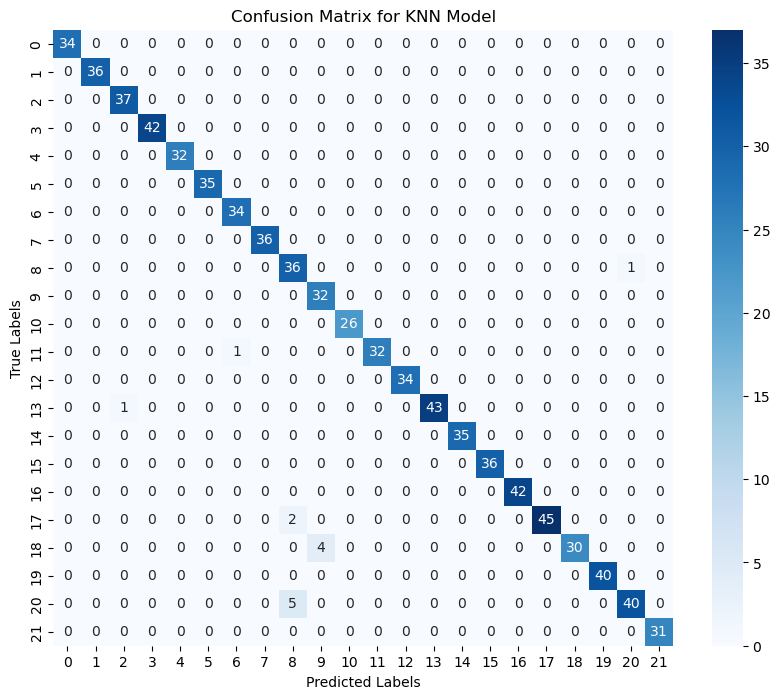

In [21]:

from sklearn.metrics import confusion_matrix
import seaborn as sns

from sklearn.metrics import confusion_matrix
import seaborn as sns

KNN = KNeighborsClassifier(n_neighbors=9).fit(x_train, y_train)
predicted_values = KNN.predict(x_test)

# Plot the confusion matrix
cm = confusion_matrix(y_test, predicted_values)
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='o')
plt.title('Confusion Matrix for KNN Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()





In [22]:
print('KNN Accuracy on training set: ', KNN.score(x_train, y_train))
print('KNN Accuracy on test set: ', KNN.score(x_test, y_test))

KNN Accuracy on training set:  0.9824675324675325
KNN Accuracy on test set:  0.9787878787878788


In [23]:
# Save Model as Pickel
KNN_pkl_filename = 'KNNprediction.pkl'
KNN_Model_pkl = open(KNN_pkl_filename, 'wb')
pickle.dump(KNN, KNN_Model_pkl)
KNN_Model_pkl.close()

In [24]:
NaiveBayes = GaussianNB()
NaiveBayes.fit(x_train, y_train)
predicted_values = NaiveBayes.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print(classification_report(y_test, predicted_values))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        30
   blackgram       1.00      1.00      1.00        31
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        26
      coffee       1.00      1.00      1.00        29
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        30
        jute       0.91      0.97      0.94        31
 kidneybeans       1.00      1.00      1.00        26
      lentil       1.00      1.00      1.00        22
       maize       1.00      1.00      1.00        27
       mango       1.00      1.00      1.00        28
   mothbeans       1.00      1.00      1.00        36
    mungbean       1.00      1.00      1.00        29
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      1.00        34
      papaya       1.00    

# Visualize For Naive Bays

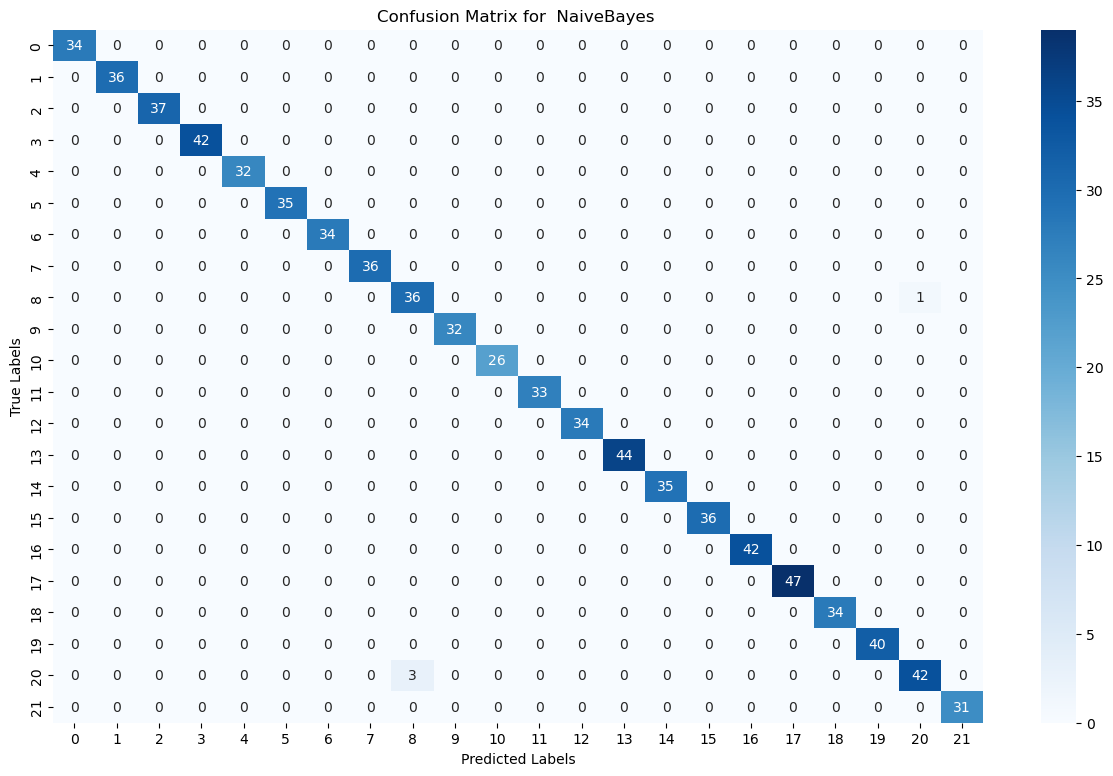

In [25]:

from sklearn.metrics import confusion_matrix
import seaborn as sns

NaiveBayes.fit(x_train, y_train)
predicted_values = NaiveBayes.predict(x_test)

# Plot the confusion matrix
cm = confusion_matrix(y_test, predicted_values)
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='o')
plt.title('Confusion Matrix for  NaiveBayes ')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [26]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
NaiveBayesprediction = NaiveBayes.predict(data)
print(NaiveBayesprediction)

['jute']


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"


In [27]:
print('NaiveBayes Accuracy on training set: ',
      NaiveBayes.score(x_train, y_train))
print('NaiveBayes Accuracy on test set: ', NaiveBayes.score(x_test, y_test))

NaiveBayes Accuracy on training set:  0.9948051948051948
NaiveBayes Accuracy on test set:  0.9939393939393939


In [28]:
# Save Model as Pickel
NB_pkl_filename = 'NBClassifier.pkl'
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
NB_Model_pkl.close()

In [29]:
RandomForest = RandomForestClassifier(n_estimators=20, random_state=0)
RandomForest.fit(x_train, y_train)

predicted_values = RandomForest.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('RandomForest')
print(classification_report(y_test, predicted_values))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        30
   blackgram       0.97      0.97      0.97        31
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        26
      coffee       1.00      1.00      1.00        29
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        30
        jute       1.00      0.97      0.98        31
 kidneybeans       1.00      1.00      1.00        26
      lentil       1.00      1.00      1.00        22
       maize       0.96      1.00      0.98        27
       mango       1.00      1.00      1.00        28
   mothbeans       1.00      0.97      0.99        36
    mungbean       1.00      1.00      1.00        29
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      1.00        34
      papaya       1.00    

# **Visualize Random Forest**

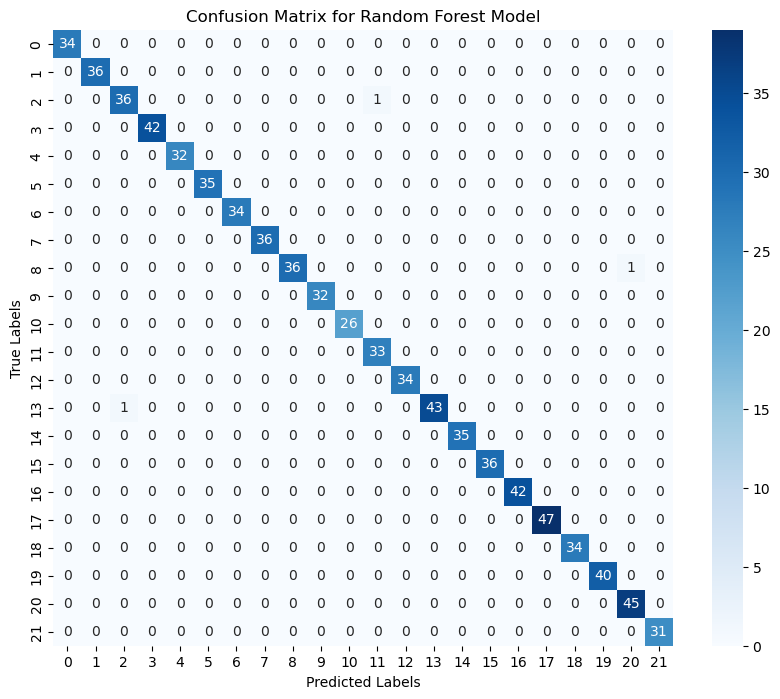

In [30]:

from sklearn.metrics import confusion_matrix
import seaborn as sns

rf_model = RandomForestClassifier(n_estimators=20, random_state=0)
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)

# Plot the confusion matrix
cm = confusion_matrix(y_test, predicted_values)
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='o')
plt.title('Confusion Matrix for Random Forest Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [31]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
RandomForestPrediction = RandomForest.predict(data)
print(RandomForestPrediction)

['jute']


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [32]:
print('Random Forest Accuracy on training set: ',
      RandomForest.score(x_train, y_train))
print('Random Forest Accuracy on test set: ',
      RandomForest.score(x_test, y_test))

Random Forest Accuracy on training set:  1.0
Random Forest Accuracy on test set:  0.9954545454545455


In [33]:
# Save Model as Pickel
RF_pkl_filename = 'RandomForest.pkl'
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RandomForest, RF_Model_pkl)
RF_Model_pkl.close()

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

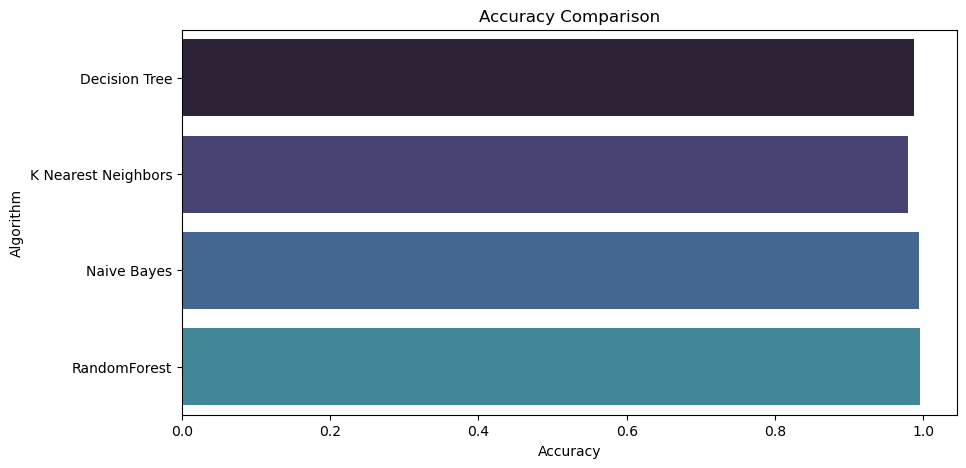

In [34]:
plt.figure(figsize=[10, 5], dpi=100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x=acc, y=model, palette=sns.color_palette("mako"))

In [35]:
# Check Model's Accuracy
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print(k, ' : ', v)

Decision Tree  :  0.9878787878787879
K Nearest Neighbors  :  0.9787878787878788
Naive Bayes  :  0.9939393939393939
RandomForest  :  0.9954545454545455


In [36]:
models = [RandomForestClassifier(n_estimators=20, random_state=0),
          GaussianNB(),
          KNeighborsClassifier(n_neighbors=3),
          DecisionTreeClassifier(random_state=0)]

In [37]:

# Get the top 3 predictions for a new input
new_data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
probabilities = DecisionTree.predict_proba(new_data)
top3_indices = np.argsort(-probabilities)[0][:3]
top3_predictions = DecisionTree.classes_[top3_indices]
print(f"Top 3 predictions: {top3_predictions}")

Top 3 predictions: ['coffee' 'apple' 'pomegranate']


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [38]:
# Dictionary that maps each crop to its CO2, O2, water usage, and carbon footprint values
crop_data = {
    "apple": {"co2_emissions": 1.5, "o2_emissions": 0.4, "water_usage": 800,"carbon_footprint":0.98},
    "banana": {"co2_emissions": 0.9, "o2_emissions": 0.2, "water_usage": 790,"carbon_footprint":0.64},
    "blackgram": {"co2_emissions": 0.9, "o2_emissions": 0.4, "water_usage": 350,"carbon_footprint":0.67},
    "chickpea": {"co2_emissions": 0.8, "o2_emissions": 0.3, "water_usage": 450,"carbon_footprint":0.78},
    "coconut": {"co2_emissions": 1.2, "o2_emissions": 0.2, "water_usage": 650,"carbon_footprint":0.57},
    "coffee": {"co2_emissions": 1.2, "o2_emissions": 0.5, "water_usage": 650,"carbon_footprint":0.78},
    "cotton": {"co2_emissions": 0.8, "o2_emissions": 0.3, "water_usage": 500,"carbon_footprint":1.40},
    "grapes": {"co2_emissions": 1.2, "o2_emissions": 0.2, "water_usage": 770,"carbon_footprint":0.69},
    "jute": {"co2_emissions": 1.3, "o2_emissions": 0.3, "water_usage": 300,"carbon_footprint":1.20},
    "kidneybeans": {"co2_emissions": 1.2, "o2_emissions": 0.4, "water_usage": 450,"carbon_footprint":0.76},
    "lentil": {"co2_emissions": 0.7, "o2_emissions": 0.3, "water_usage": 450,"carbon_footprint":0.43},
    "maize": {"co2_emissions": 1.0, "o2_emissions": 0.3, "water_usage": 450,"carbon_footprint":1.00},
    "mango": {"co2_emissions": 1.3, "o2_emissions": 0.3, "water_usage": 400,"carbon_footprint":0.90},
    "mothbeans": {"co2_emissions": 0.7, "o2_emissions": 0.3, "water_usage": 350,"carbon_footprint":0.67},
    "mungbean": {"co2_emissions": 0.6, "o2_emissions": 0.3, "water_usage": 200,"carbon_footprint":0.47},
    "muskmelon": {"co2_emissions": 0.8, "o2_emissions": 0.1, "water_usage": 600,"carbon_footprint":0.32},
    "orange": {"co2_emissions": 1.2, "o2_emissions": 0.2, "water_usage": 790,"carbon_footprint":0.70},
    "papaya": {"co2_emissions": 0.9, "o2_emissions": 0.3, "water_usage": 600,"carbon_footprint":0.39},
    "pigeonpeas": {"co2_emissions": 1.1, "o2_emissions": 0.4, "water_usage": 350,"carbon_footprint":0.59},
    "pomegranate": {"co2_emissions": 1.1, "o2_emissions": 0.6, "water_usage": 450,"carbon_footprint":0.55},
    "rice": {"co2_emissions": 1.3, "o2_emissions": 0.4, "water_usage": 900,"carbon_footprint":1.20},
    "watermelon": {"co2_emissions": 0.6, "o2_emissions": 0.1, "water_usage":250,"carbon_footprint":0.29}
}

# Retrieve the top 3 predictions and calculate the CO2, O2, water usage, and carbon footprint values for each crop
top3_predictions_data = {}
for prediction in top3_predictions:
    crop_data_for_prediction = crop_data.get(prediction.lower())
    if crop_data_for_prediction:
        top3_predictions_data[prediction] = crop_data_for_prediction

# Calculate the total CO2, O2, water usage, and carbon footprint values for the top 3 predictions
total_co2 = sum(crop_data.get("co2_emissions", 0) for crop_data in top3_predictions_data.values())
total_o2 = sum(crop_data.get("o2_emissions", 0) for crop_data in top3_predictions_data.values())
total_water_usage = sum(crop_data.get("water_usage", 0) for crop_data in top3_predictions_data.values())
total_carbon_footprint = sum(crop_data.get("carbon_footprint", 0) for crop_data in top3_predictions_data.values())

# Print the results
print(f"Top 3 predictions: {top3_predictions}")
print(f"Total CO2: {total_co2}")
print(f"Total O2: {total_o2}")
print(f"Total water usage: {total_water_usage}")
print(f"Total carbon footprint: {total_carbon_footprint}")

Top 3 predictions: ['coffee' 'apple' 'pomegranate']
Total CO2: 3.8000000000000003
Total O2: 1.5
Total water usage: 1900
Total carbon footprint: 2.31


In [39]:
# Print the emissions for each crop in the top 3 predictions
for i, prediction in enumerate(top3_predictions_data.keys()):
    crop_data_for_prediction = top3_predictions_data[prediction]
    water_usage = crop_data_for_prediction.get("water_usage")
    o2_emissions = crop_data_for_prediction.get("o2_emissions")
    co2_emissions = crop_data_for_prediction.get("co2_emissions")
    carbon_footprint=crop_data_for_prediction.get("carbon_footprint")
    print(f"Crop {i+1}: {prediction} has Water Usage emissions of {water_usage}, O2 emissions of {o2_emissions}, and CO2 emissions of {co2_emissions}, and Carbon footprint of {carbon_footprint}")

Crop 1: coffee has Water Usage emissions of 650, O2 emissions of 0.5, and CO2 emissions of 1.2, and Carbon footprint of 0.78
Crop 2: apple has Water Usage emissions of 800, O2 emissions of 0.4, and CO2 emissions of 1.5, and Carbon footprint of 0.98
Crop 3: pomegranate has Water Usage emissions of 450, O2 emissions of 0.6, and CO2 emissions of 1.1, and Carbon footprint of 0.55


In [40]:
# Print the CO2 emissions for each crop in the top 3 predictions
for i, prediction in enumerate(top3_predictions_data.keys()):
    crop_data_for_prediction = top3_predictions_data[prediction]
    co2_emissions = crop_data_for_prediction.get("co2_emissions")
    print(f"Crop {i+1}: {prediction} has CO2 emissions of {co2_emissions}")

Crop 1: coffee has CO2 emissions of 1.2
Crop 2: apple has CO2 emissions of 1.5
Crop 3: pomegranate has CO2 emissions of 1.1


In [41]:
# Print the water_usage emissions for each crop in the top 3 predictions
for i, prediction in enumerate(top3_predictions_data.keys()):
    crop_data_for_prediction = top3_predictions_data[prediction]
    co2_emissions = crop_data_for_prediction.get("water_usage")
    print(f"Crop {i+1}: {prediction} has Water Usage of {water_usage}")

Crop 1: coffee has Water Usage of 450
Crop 2: apple has Water Usage of 450
Crop 3: pomegranate has Water Usage of 450


In [42]:
# Print the CO2 emissions for each crop in the top 3 predictions
for i, prediction in enumerate(top3_predictions_data.keys()):
    crop_data_for_prediction = top3_predictions_data[prediction]
    co2_emissions = crop_data_for_prediction.get("o2")
    print(f"Crop {i+1}: {prediction} has O2 emissions of {o2_emissions}")

Crop 1: coffee has O2 emissions of 0.6
Crop 2: apple has O2 emissions of 0.6
Crop 3: pomegranate has O2 emissions of 0.6


In [43]:
# Print the carbon footprint emissions for each crop in the top 3 predictions
for i, prediction in enumerate(top3_predictions_data.keys()):
    crop_data_for_prediction = top3_predictions_data[prediction]
    co2_emissions = crop_data_for_prediction.get("carbon_footprint")
    print(f"Crop {i+1}: {prediction} has Carbon Footprint of {carbon_footprint}")

Crop 1: coffee has Carbon Footprint of 0.55
Crop 2: apple has Carbon Footprint of 0.55
Crop 3: pomegranate has Carbon Footprint of 0.55


In [44]:
labels = ['Nitrogen(N)','Phosphorous(P)','Potash(K)']
fig = make_subplots(rows=1, cols=5, specs=[[{'type':'domain'}, {'type':'domain'},
                                            {'type':'domain'}, {'type':'domain'}, 
                                            {'type':'domain'}]])

rice_npk = crop_summary[crop_summary.index=='rice']
values = [rice_npk['N'][0], rice_npk['P'][0], rice_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Rice"),1, 1)

cotton_npk = crop_summary[crop_summary.index=='cotton']
values = [cotton_npk['N'][0], cotton_npk['P'][0], cotton_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Cotton"),1, 2)

jute_npk = crop_summary[crop_summary.index=='jute']
values = [jute_npk['N'][0], jute_npk['P'][0], jute_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Jute"),1, 3)

maize_npk = crop_summary[crop_summary.index=='maize']
values = [maize_npk['N'][0], maize_npk['P'][0], maize_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Maize"),1, 4)

lentil_npk = crop_summary[crop_summary.index=='lentil']
values = [lentil_npk['N'][0], lentil_npk['P'][0], lentil_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Lentil"),1, 5)


fig.update_traces(hole=.4, hoverinfo="label+percent+name")
fig.update_layout(
    title_text="NPK ratio for rice, cotton, jute, maize, lentil",
    annotations=[dict(text='Rice',x=0.06,y=0.8, font_size=15, showarrow=False),
                 dict(text='Cotton',x=0.26,y=0.8, font_size=15, showarrow=False),
                 dict(text='Jute',x=0.50,y=0.8, font_size=15, showarrow=False),
                 dict(text='Maize',x=0.74,y=0.8, font_size=15, showarrow=False),
                dict(text='Lentil',x=0.94,y=0.8, font_size=15, showarrow=False)])
fig.show()

In [45]:
labels = ['Nitrogen(N)','Phosphorous(P)','Potash(K)']
specs = [[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}],[
         {'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=2, cols=5, specs=specs)
cafe_colors =  ['rgb(255, 128, 0)', 'rgb(0, 153, 204)', 'rgb(173, 173, 133)']

apple_npk = crop_summary[crop_summary.index=='apple']
values = [apple_npk['N'][0], apple_npk['P'][0], apple_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Apple", marker_colors=cafe_colors),1, 1)

banana_npk = crop_summary[crop_summary.index=='banana']
values = [banana_npk['N'][0], banana_npk['P'][0], banana_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Banana", marker_colors=cafe_colors),1, 2)

grapes_npk = crop_summary[crop_summary.index=='grapes']
values = [grapes_npk['N'][0], grapes_npk['P'][0], grapes_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Grapes", marker_colors=cafe_colors),1, 3)

orange_npk = crop_summary[crop_summary.index=='orange']
values = [orange_npk['N'][0], orange_npk['P'][0], orange_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Orange", marker_colors=cafe_colors),1, 4)

mango_npk = crop_summary[crop_summary.index=='mango']
values = [mango_npk['N'][0], mango_npk['P'][0], mango_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Mango", marker_colors=cafe_colors),1, 5)

coconut_npk = crop_summary[crop_summary.index=='coconut']
values = [coconut_npk['N'][0], coconut_npk['P'][0], coconut_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Coconut", marker_colors=cafe_colors),2, 1)

papaya_npk = crop_summary[crop_summary.index=='papaya']
values = [papaya_npk['N'][0], papaya_npk['P'][0], papaya_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Papaya", marker_colors=cafe_colors),2, 2)

pomegranate_npk = crop_summary[crop_summary.index=='pomegranate']
values = [pomegranate_npk['N'][0], pomegranate_npk['P'][0], pomegranate_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Pomegranate", marker_colors=cafe_colors),2, 3)

watermelon_npk = crop_summary[crop_summary.index=='watermelon']
values = [watermelon_npk['N'][0], watermelon_npk['P'][0], watermelon_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Watermelon", marker_colors=cafe_colors),2, 4)

muskmelon_npk = crop_summary[crop_summary.index=='muskmelon']
values = [muskmelon_npk['N'][0], muskmelon_npk['P'][0], muskmelon_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Muskmelon", marker_colors=cafe_colors),2, 5)

fig.update_layout(
    title_text="NPK ratio for fruits",
    annotations=[dict(text='Apple',x=0.06,y=1.08, font_size=15, showarrow=False),
                 dict(text='Banana',x=0.26,y=1.08, font_size=15, showarrow=False),
                 dict(text='Grapes',x=0.50,y=1.08, font_size=15, showarrow=False),
                 dict(text='Orange',x=0.74,y=1.08, font_size=15, showarrow=False),
                dict(text='Mango',x=0.94,y=1.08, font_size=15, showarrow=False),
                dict(text='Coconut',x=0.06,y=0.46, font_size=15, showarrow=False),
                 dict(text='Papaya',x=0.26,y=0.46, font_size=15, showarrow=False),
                 dict(text='Pomegranate',x=0.50,y=0.46, font_size=15, showarrow=False),
                 dict(text='Watermelon',x=0.74,y=0.46, font_size=15, showarrow=False),
                dict(text='Muskmelon',x=0.94,y=0.46, font_size=15, showarrow=False)])
fig.show()

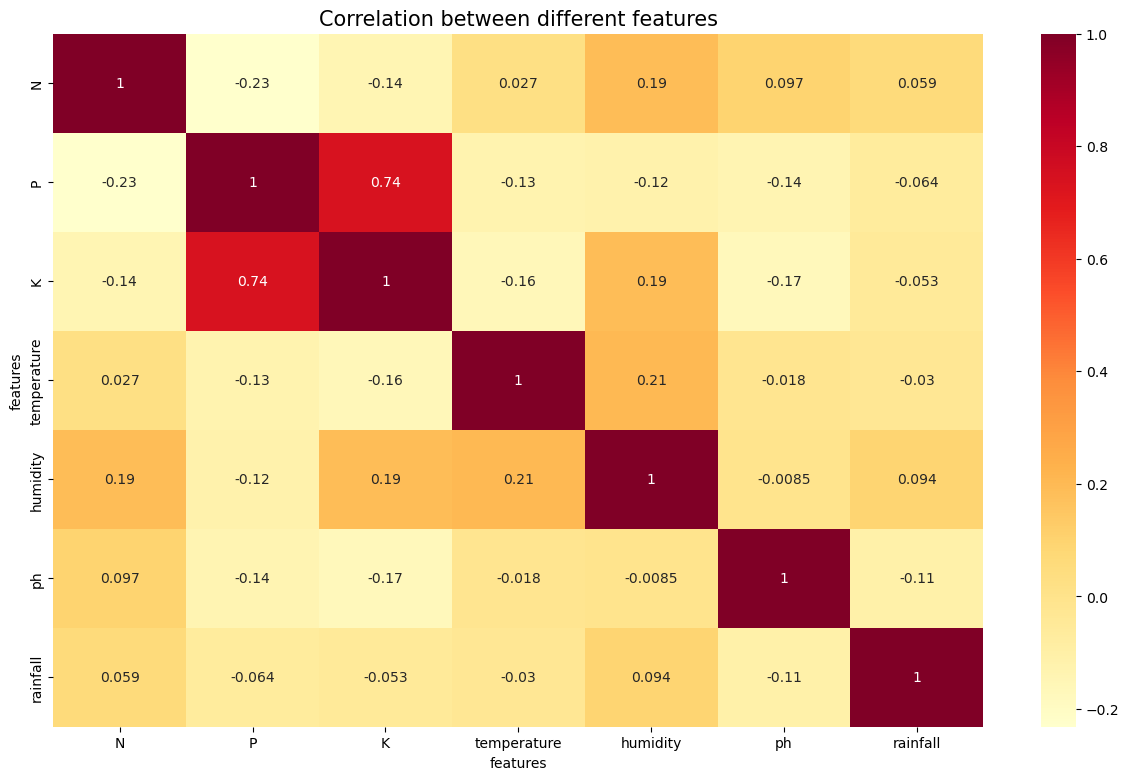

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
sns.heatmap(df_crops.corr(), annot=True,cmap='YlOrRd')
ax.set(xlabel='features')
ax.set(ylabel='features')

plt.title('Correlation between different features', fontsize = 15, c='black')
plt.show()